In [7]:
import pandas as pd
import pylab
df = pd.read_csv("marketing_AB.csv")
df.head()
df["test group"].value_counts()


ad     564577
psa     23524
Name: test group, dtype: int64

In [8]:
df["test group"].value_counts(normalize=True)


ad     0.96
psa    0.04
Name: test group, dtype: float64

In [9]:
df.groupby("test group")["user id"].agg(["count", "nunique"])


,count,nunique
test group,,
ad,564577,564577
psa,23524,23524


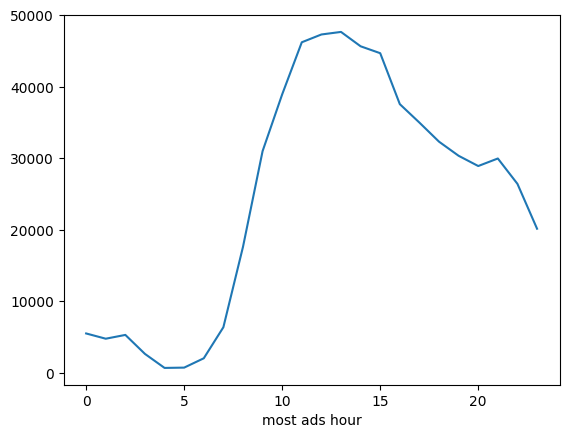

In [10]:
df.groupby("most ads hour")["user id"].count().plot()
pylab.show()

In [11]:
df.groupby("most ads hour")["user id"].agg(["count", "nunique"])

,count,nunique
most ads hour,,
0,5536,5536
1,4802,4802
2,5333,5333
3,2679,2679
4,722,722
5,765,765
6,2068,2068
7,6405,6405
8,17627,17627


In [13]:
group1 = df[df["test group"] == "ad"]
group2 = df[df["test group"] == "psa"]
df["total ads flag"] = (df["total ads"] > 0) * 1
df["most ads hour flag"] = (df["most ads hour"] > 0) * 1
df.groupby(["test group"])[["total ads flag", "total ads"]].agg(
        {"total ads flag": ["count", "mean"], "total ads": ["mean", "median"]})

total ads flag       total ads       
                    count mean       mean median
test group                                      
ad                 564577  1.0  24.823365   13.0
psa                 23524  1.0  24.761138   12.0

In [15]:
 from scipy.stats import ttest_ind
 ttest_ind(a=group1["total ads"], b=group2["total ads"])

TtestResult(statistic=0.21391499762385457, pvalue=0.8306134186810267, df=588099.0)

In [17]:
 ttest_ind(a=group1["most ads hour"], b=group2["most ads hour"])

TtestResult(statistic=5.3146593612880295, pvalue=1.0689580767940877e-07, df=588099.0)

In [20]:
df = pd.read_csv("marketing_AB.csv")
df.head()
df1 = round((df.pivot_table(index="test group", columns="most ads day", values="converted", aggfunc="sum", fill_value=0) / len(df[df["converted"]==True])) * 100.0, 2)
df1.head()

most ads day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
test group,,,,,,,
ad,13.44,18.72,11.31,13.66,11.53,15.29,13.23
psa,0.42,0.53,0.27,0.42,0.53,0.28,0.37


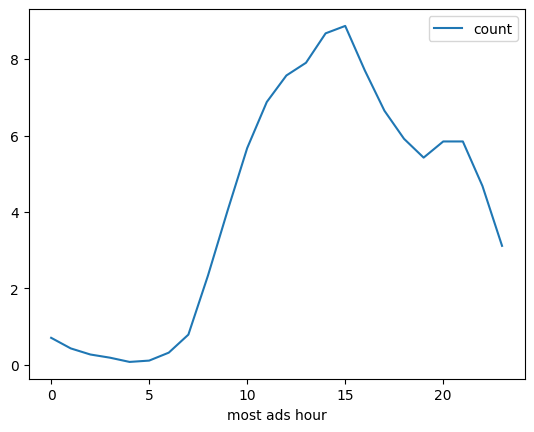

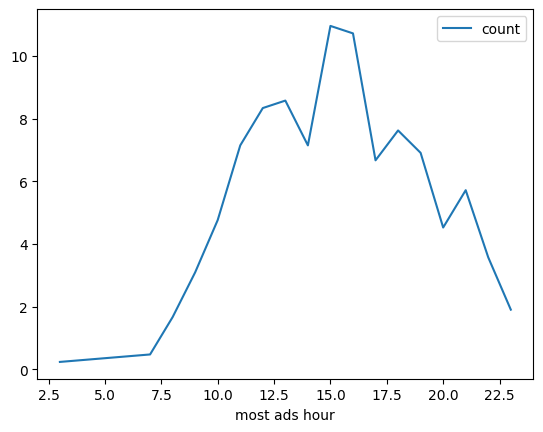

In [19]:
df = pd.read_csv("marketing_AB.csv")
for group in ("ad", "psa"):
  test_group = df[df["test group"]==group][df[df["test group"]==group]["converted"]==True].groupby("most ads hour")["user id"].agg(["count"])
  test_group["count"] = test_group["count"] / len(df[df["test group"]==group][df[df["test group"]==group]["converted"]==True]) * 100
  test_group.plot()